# Lightcurve of Vesta


* I used astroimageJ to measure photometry.
  * Import -> image stack
  * multi-aperture photometry
  

* save file in xls format

* opened in open office and saved as csv file (I was running this on my linux laptop).  You could do this is excel if running on a windows machine or mac.  Or, upload the xls file to google sheets and download a csv version.


In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np

# Reading in the data for the full 3-hr observing sequence

* this file has 83 measurements
* this is the R-band data

In [3]:
datafile = 'tables/vesta-Rphot-2021-03-19.csv'

In [4]:
tab = Table.read(datafile,format='csv')

In [5]:
tab.colnames

['col0',
 'Label',
 'slice',
 'Saturated',
 'J.D.-2400000',
 'JD_UTC',
 'JD_SOBS',
 'HJD_UTC',
 'BJD_TDB',
 'AIRMASS',
 'ALT_OBJ',
 'CCD-TEMP',
 'EXPTIME',
 'RAOBJ2K',
 'DECOBJ2K',
 'Source_Radius',
 'FWHM_Mult',
 'Source_Rad(base)',
 'Sky_Rad(min)',
 'Sky_Rad(max)',
 'rel_flux_T1',
 'rel_flux_C2',
 'rel_flux_C3',
 'rel_flux_err_T1',
 'rel_flux_err_C2',
 'rel_flux_err_C3',
 'rel_flux_SNR_T1',
 'rel_flux_SNR_C2',
 'rel_flux_SNR_C3',
 'tot_C_cnts',
 'tot_C_err',
 'X(IJ)_T1',
 'Y(IJ)_T1',
 'X(FITS)_T1',
 'Y(FITS)_T1',
 'Source-Sky_T1',
 'Source_Error_T1',
 'Source_SNR_T1',
 'Peak_T1',
 'Mean_T1',
 'Sky/Pixel_T1',
 'Width_T1',
 'X-Width_T1',
 'Y-Width_T1',
 'Angle_T1',
 'Roundness_T1',
 'X(IJ)_C2',
 'Y(IJ)_C2',
 'X(FITS)_C2',
 'Y(FITS)_C2',
 'Source-Sky_C2',
 'Source_Error_C2',
 'Source_SNR_C2',
 'Peak_C2',
 'Mean_C2',
 'Sky/Pixel_C2',
 'Width_C2',
 'X-Width_C2',
 'Y-Width_C2',
 'Angle_C2',
 'Roundness_C2',
 'X(IJ)_C3',
 'Y(IJ)_C3',
 'X(FITS)_C3',
 'Y(FITS)_C3',
 'Source-Sky_C3',
 'Source_

# Normalize by Exposure Time

* I am using the source - sky flux, and then dividing by the exposure time
  * we adjusted the exposure time during the sequence, so we need to account for this
* I am also dividing the error by the exposure time

* I then convert the fluxes to magnitudes and calculate the error in the magnitude

* Finally, I subtract the first time from array of Julian times, and multiply by 24 to convert to hours

In [6]:
# normalize brightness by exposure time
#
# this is necessary because we used different 
# exposure times throughout the observing sequence
flux_T1 = tab['Source-Sky_T1']/tab['EXPTIME']
flux_C2 = tab['Source-Sky_C2']/tab['EXPTIME']
flux_C3 = tab['Source-Sky_C3']/tab['EXPTIME']

# normalize the error in brightness by the exposure time
err_T1 = tab['Source_Error_T1']/tab['EXPTIME']
err_C2 = tab['Source_Error_C2']/tab['EXPTIME']
err_C3 = tab['Source_Error_C3']/tab['EXPTIME']


# calculate magnitude
mag_T1 = -2.5*np.log10(flux_T1)
mag_C2 = -2.5*np.log10(flux_C2)
mag_C3 = -2.5*np.log10(flux_C3)

# calculate the error in magnitude
merr_T1 = -2.5*np.log10(flux_T1-err_T1)-mag_T1
merr_C2 = -2.5*np.log10(flux_C2-err_C2)-mag_C2
merr_C3 = -2.5*np.log10(flux_C3-err_C3)-mag_C3

# subtract first time (to get rid of long julian date)
# multiply by 24 to convert from days to hours
tobs = (tab['J.D.-2400000'] - tab['J.D.-2400000'][0])*24

# save airmass in a convenient form
airmass = tab['AIRMASS']

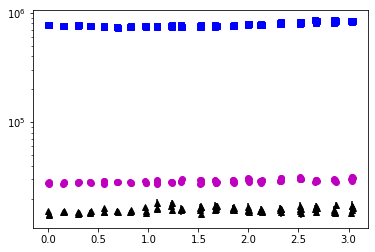

In [7]:
plt.figure()
plt.errorbar(tobs,flux_T1,yerr=err_T1,fmt='bs')
plt.errorbar(tobs,flux_C2,yerr=err_C2,fmt='mo')
plt.errorbar(tobs,flux_C3,yerr=err_C3,fmt='k^')
plt.gca().set_yscale('log')

# Normalize the flux

* Vesta is MUCH brighter than the comparison stars
* I normalize the flux (and flux error) by dividing by the max value for each source
  * this will bring the flux for all sources onto the same scale - they should all be around 1

In [8]:

nflux_T1 = flux_T1/np.mean(flux_T1)
nflux_C2 = flux_C2/np.mean(flux_C2)
nflux_C3 = flux_C3/np.mean(flux_C3)


nerr_T1 = err_T1/np.mean(flux_T1)
nerr_C2 = err_C2/np.mean(flux_C2)
nerr_C3 = err_C3/np.mean(flux_C3)

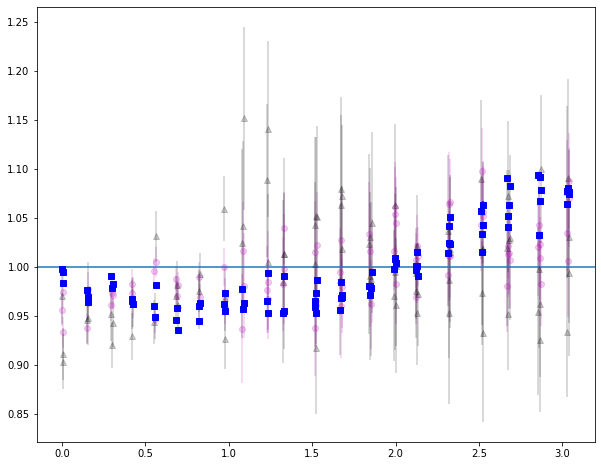

In [9]:
plt.figure(figsize=(10,8))
plt.errorbar(tobs,nflux_C2,yerr=nerr_C2,fmt='mo',alpha=.2)
plt.errorbar(tobs,nflux_C3,yerr=nerr_C3,fmt='k^',alpha=.2)
plt.errorbar(tobs,nflux_T1,yerr=nerr_T1,fmt='bs')

plt.axhline(y=1)

* The figure above seems to show vesta varying more than the comparison objects.  
* However, we still need to correct for airmass.

# Looking at Magnitude vs Time

* the comparison stars show a systematic decrease in magnitude vs time
* the decrease in magnitude means that the stars are getting brighter with time
* this is due to the fact that the airmass is changing - the airmass of our targets decreased continually over the 3-hour observing sequence.

Text(0.5, 0, 'Time (hrs)')

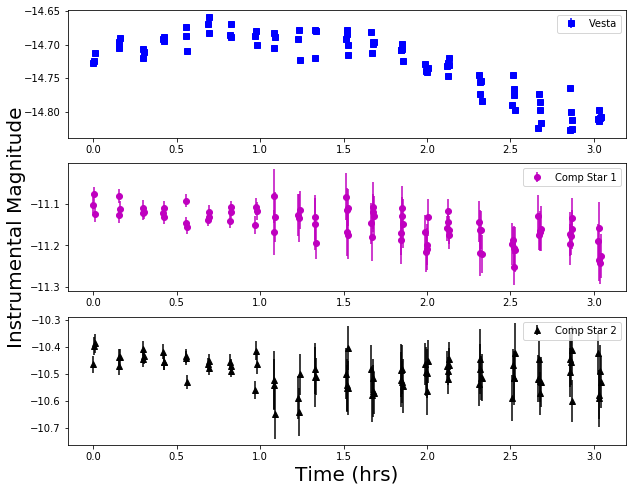

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.errorbar(tobs,mag_T1,yerr=merr_T1,fmt='bs',label='Vesta')
plt.legend()
plt.subplot(3,1,2)
plt.errorbar(tobs,mag_C2,yerr=merr_C2,fmt='mo',label='Comp Star 1')
plt.legend()
plt.ylabel('Instrumental Magnitude',fontsize=20)
plt.subplot(3,1,3)
plt.errorbar(tobs,mag_C3,yerr=merr_C3,fmt='k^',label='Comp Star 2')
plt.legend()
plt.xlabel('Time (hrs)',fontsize=20)

# Fitting the Airmass Term



* we can use the data for the comparison stars to fit the airmass term.
* the expected dependence on airmass (sec z) is
  * I am not solving for the absolute ZP at this point

$$ magnitude = ZP - 2.5 \log_{10}(flux) + C \times secz $$
  
* the function below fits a straight line to magnitude vs airmass
* the slope of the best-fit line is the airmass term
* I measure this for both comparison stars, and then choose a value that is between both
  * C2 yields 0.193 and C3 yields 0.175
  * I am using 0.18

In [11]:
def fit_line(x,y):
    c = np.polyfit(x,y,1)
    xline = np.linspace(min(x),max(x),100)
    yline = np.polyval(c,xline)
    plt.plot(xline,yline,'c--')
    print(c)
    return c

[  0.19344448 -11.39084519]
0.1934444806570374
[  0.17501787 -10.71172011]


Text(0.5, 0, 'Airmass')

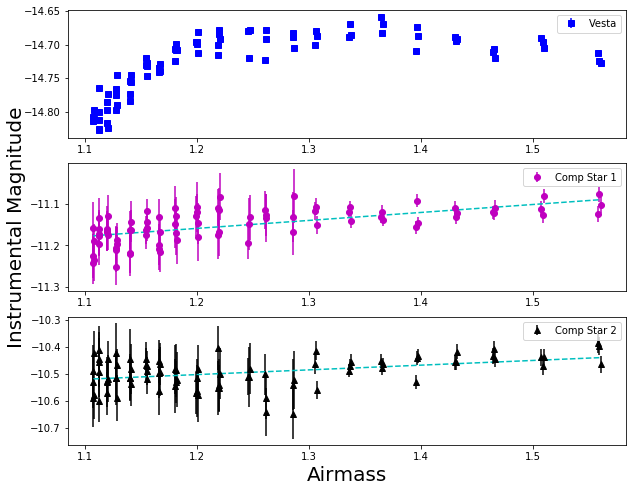

In [12]:
x=airmass
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.errorbar(x,mag_T1,yerr=merr_T1,fmt='bs',label='Vesta')
plt.legend()
plt.subplot(3,1,2)
plt.errorbar(x,mag_C2,yerr=merr_C2,fmt='mo',label='Comp Star 1')
coeff=fit_line(x,mag_C2)
print(coeff[0])
plt.legend()
plt.ylabel('Instrumental Magnitude',fontsize=20)
plt.subplot(3,1,3)
plt.errorbar(x,mag_C3,yerr=merr_C3,fmt='k^',label='Comp Star 2')
t = fit_line(x,mag_C3)
plt.legend()
plt.xlabel('Airmass',fontsize=20)

In [13]:
# correct for airmass
corr = .18
ZP=21
# store corrected values as cmag_XX
cmag_T1 = ZP - 2.5*np.log10(flux_T1) - corr*airmass
cmag_C2 = ZP - 2.5*np.log10(flux_C2) - corr*airmass
cmag_C3 = ZP - 2.5*np.log10(flux_C3) - corr*airmass

# Plot magnitude vs airmass to check correction

* the plot below shows a fairly flat relation for C2 and C3.  This is what we expect to get once the airmass term is accounted for. 

0.1934444806570374


Text(0.5, 0, 'Airmass')

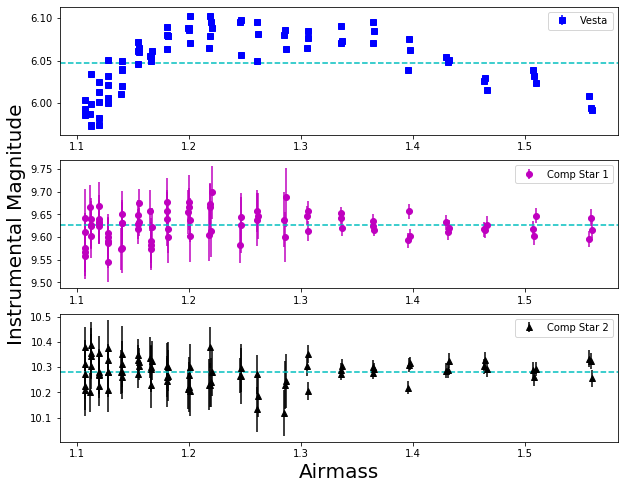

In [14]:
x=airmass
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.errorbar(x,cmag_T1,yerr=merr_T1,fmt='bs',label='Vesta')
plt.axhline(y=np.mean(cmag_T1),ls='--',c='c')
plt.legend()
plt.subplot(3,1,2)
plt.errorbar(x,cmag_C2,yerr=merr_C2,fmt='mo',label='Comp Star 1')
plt.axhline(y=np.mean(cmag_C2),ls='--',c='c')
print(coeff[0])
plt.legend()
plt.ylabel('Instrumental Magnitude',fontsize=20)
plt.subplot(3,1,3)
plt.errorbar(x,cmag_C3,yerr=merr_C3,fmt='k^',label='Comp Star 2')
plt.axhline(y=np.mean(cmag_C3),ls='--',c='c')
plt.legend()
plt.xlabel('Airmass',fontsize=20)

# Corrected Magnitude vs Time

* now that we have determined the airmass correction, we can plot the corrected magnitude vs time.
* This is the light curve.
* we see that Vesta's magnitude is changing, while the magnitudes of the comparison stars remain fairly constant.
* Woo hoo!

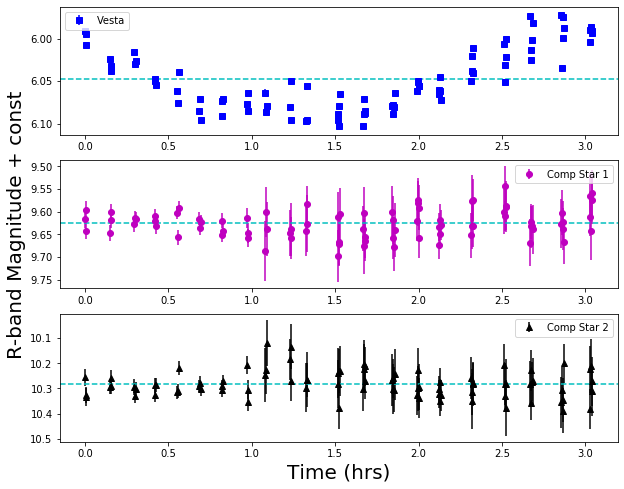

In [15]:
x=tobs
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.errorbar(x,cmag_T1,yerr=merr_T1,fmt='bs',label='Vesta')
plt.axhline(y=np.mean(cmag_T1),ls='--',c='c')
plt.legend()
plt.gca().invert_yaxis()
plt.subplot(3,1,2)
plt.errorbar(x,cmag_C2,yerr=merr_C2,fmt='mo',label='Comp Star 1')
plt.axhline(y=np.mean(cmag_C2),ls='--',c='c')
plt.legend()
plt.gca().invert_yaxis()
plt.ylabel('R-band Magnitude + const',fontsize=20)
plt.subplot(3,1,3)
plt.errorbar(x,cmag_C3,yerr=merr_C3,fmt='k^',label='Comp Star 2')
plt.axhline(y=np.mean(cmag_C3),ls='--',c='c')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('Time (hrs)',fontsize=20)
plt.savefig('vesta-lightcurve.png')